# Task 5 - Learning crowd dynamics

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from helpers.data import load_mi_data
from helpers.plot import plot_pandas_dataset

## 1 - Load and plot the data

In [3]:
df = load_mi_data("data/MI_timesteps.txt", skip_first=1000)
df.shape


(14001, 9)

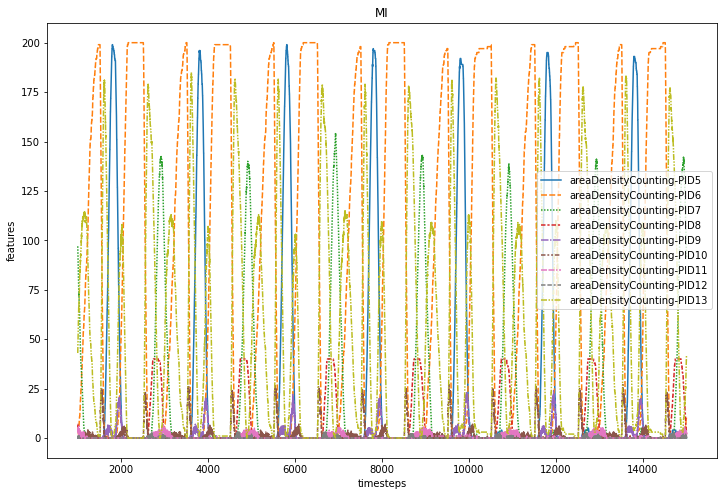

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_pandas_dataset(df, x_label="timesteps", y_label="features", title="MI", ax=ax)


## 2 - TODO

In [5]:
M = 12000

out = np.zeros((M, 351*3))
for i in range(0, M):
    out[i, :] = df.iloc[i:i+351, :3].to_numpy().reshape(-1)

out.shape

(12000, 1053)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
out_transformed = pca.fit_transform(out)
out_transformed.shape

(12000, 3)

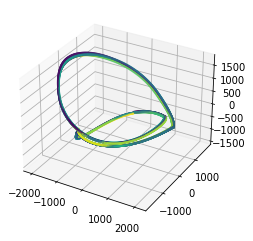

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*out_transformed.T, c=np.arange(0, M), s=1)

## 3 - Compute arc length of curve in embedding space

In [12]:
lengths = np.zeros(M)
curr_length = 0

for i in range(M):
    if i > 0:
        curr_length += np.linalg.norm(out_transformed[i] - out_transformed[i-1])
    lengths[i] = curr_length

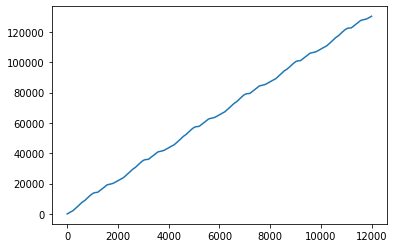

In [13]:
plt.plot(lengths)

In [18]:
velocities = np.zeros(M)
timesteps = df.index[:M]

for i in range(M):
    if i == 0:
        velocities[i] = (lengths[i+1] - lengths[i]) / (timesteps[i+1] - timesteps[i])
    elif i == M-1:
        velocities[i] = (lengths[i] - lengths[i-1]) / (timesteps[i] - timesteps[i-1])
    else:
        velocities[i] = (lengths[i+1] - lengths[i-1]) / (timesteps[i+1] - timesteps[i-1])

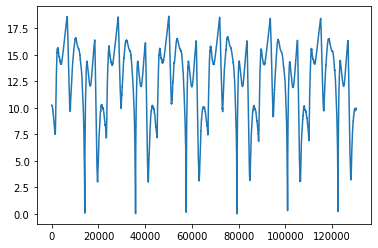

In [20]:
plt.plot(lengths, velocities)